## -

In [1]:
# Import the needed ibraries and load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_movies = pd.read_csv('movies.csv', sep='::', names=["MovieID", "Title", "Genres"], index_col=0)
df_ratings = pd.read_csv('ratings.csv', sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])
df_users = pd.read_csv('users.csv', sep='::', names=["UserID", "Genere", "Age", "Occupation", "Zip-code"], index_col=0)

<ipython-input-2-480a28f6d02e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movies = pd.read_csv('movies.csv', sep='::', names=["MovieID", "Title", "Genres"], index_col=0)
<ipython-input-2-480a28f6d02e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_ratings = pd.read_csv('ratings.csv', sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])
<ipython-input-2-480a28f6d02e>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by spec

In [3]:
df_movies.head()

,Title,Genres
MovieID,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [4]:
df_users.head(20)

,Genere,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
7,M,35,1,06810
8,M,25,12,11413
9,M,25,17,61614


In [5]:
df_ratings.tail()

,UserID,MovieID,Rating,Timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [6]:
df_users[df_users.duplicated() == True]

,Genere,Age,Occupation,Zip-code
UserID,,,,
73,M,18,4,53706
202,M,18,4,53706
301,M,18,4,61820
365,F,18,4,02138
423,M,18,4,55455
...,...,...,...,...
5959,F,18,4,14850
5997,F,25,7,10016
5998,M,18,4,61820


### Merge tables

In [7]:
Master_Data = df_movies.merge(df_ratings, on='MovieID')

In [8]:
Master_Data = Master_Data.merge(df_users, on='UserID')

In [9]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


### 1- User Age Distribution

<AxesSubplot:title={'center':'User Age Distribution'}, xlabel='Age', ylabel='Count'>

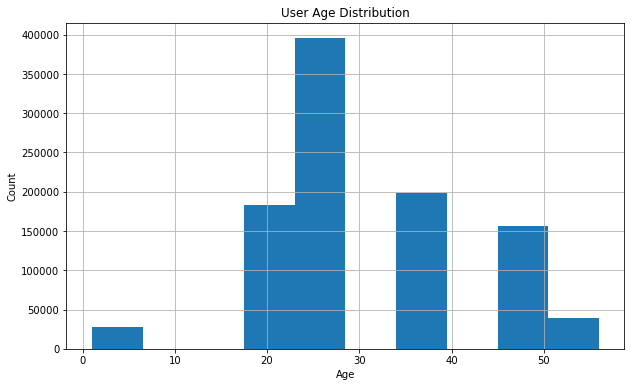

In [10]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('User Age Distribution')
Master_Data['Age'].hist()

### 2- User rating of the movie “Toy Story”

<AxesSubplot:title={'center':'User rating of the movie “Toy Story”'}, xlabel='Ratings', ylabel='Count'>

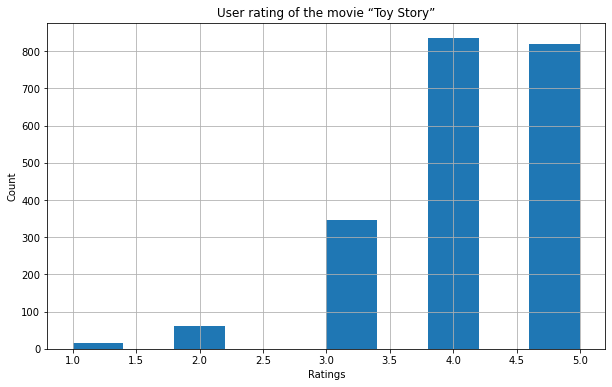

In [11]:
plt.figure(figsize=(10,6))
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('User rating of the movie “Toy Story”')
Master_Data[Master_Data['Title'] == 'Toy Story (1995)']['Rating'].hist()

### 3- Top 25 movies by viewership rating

In [12]:
Master_Data.groupby(['Title'])['Rating'].mean()  # Number of movies


Title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kj�rlighetens kj�tere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: Rating, Length: 3706, dtype: float64

In [13]:
top_rated = Master_Data.groupby(['Title'])['Rating'].mean()

In [14]:
top_rated.sort_values(inplace=True, ascending=False)

In [15]:
top_rated = top_rated[:25]

In [16]:
len(top_rated)

25

In [17]:
top_rated

Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

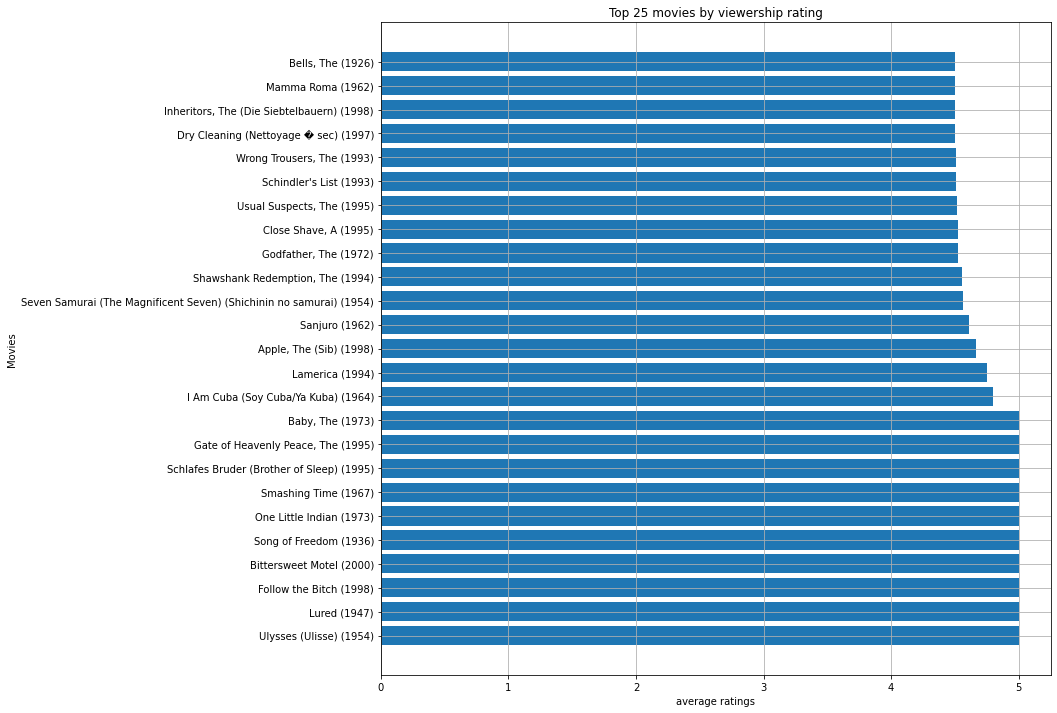

In [18]:
pos = np.arange(25)
tick = top_rated.index

plt.figure(figsize=(12,12))
plt.xlabel('average ratings')
plt.ylabel('Movies')
plt.title('Top 25 movies by viewership rating')
#plt.xticks(rotation=90)
plt.grid()
plt.barh(pos, top_rated, tick_label = tick)
plt.show()

In [19]:
Master_Data[Master_Data['Title'] == 'Smashing Time (1967)']['Rating'].mean()  # Check if the results are correct

5.0

### 4- Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [20]:
Master_Data[Master_Data['UserID'] == 2696]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


---------

## Feature Engineering:


>  Use Genres column
#### 1- Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [21]:
genres = Master_Data['Genres'].str.split('|')

In [22]:
gener_set = []
gener_set = set(gener_set)

In [23]:
for i in range(len(genres)): 
    for j in range(len(genres[i])):
        gener_set.add(genres[i][j])
         

In [24]:
gener_set

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [25]:
geners = list(gener_set)
geners

['Horror',
 'Musical',
 'Fantasy',
 'War',
 "Children's",
 'Comedy',
 'Adventure',
 'Thriller',
 'Action',
 'Film-Noir',
 'Romance',
 'Sci-Fi',
 'Crime',
 'Western',
 'Documentary',
 'Mystery',
 'Animation',
 'Drama']

#### 2- Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [26]:
Master_Data = pd.concat([Master_Data,Master_Data.Genres.str.get_dummies()], axis=1)

In [27]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


--------

#### 3- Determine the features affecting the ratings of any particular movie.

import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(Master_Data.corr(), annot=True, linewidths=.3)

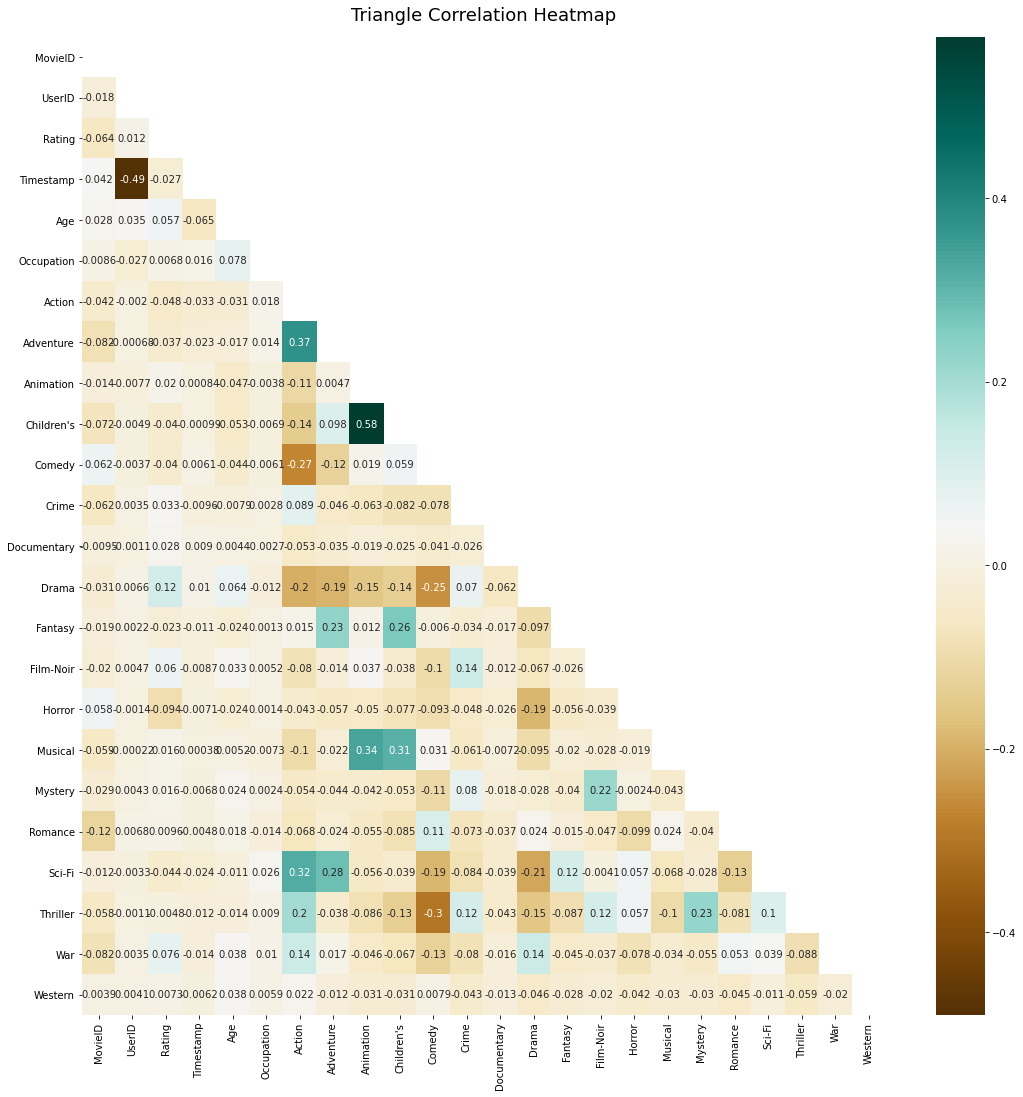

In [28]:
import seaborn as sns
mask = np.triu(np.ones_like(Master_Data.corr(), dtype=np.bool))
plt.figure(figsize=(18,18))
heatmap = sns.heatmap(Master_Data.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [29]:
Master_Data.corr()

,MovieID,UserID,Rating,Timestamp,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,...,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,...,0.002212,0.004701,-0.001392,-0.000222,0.004334,0.006834,-0.003283,-0.001107,0.003502,0.004114
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753,-0.047633,-0.036718,0.019670,-0.039829,...,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646,-0.032990,-0.023252,0.000840,-0.000991,...,-0.011237,-0.008664,-0.007079,0.000378,-0.006836,-0.004799,-0.024150,-0.011591,-0.014109,-0.006230
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,...,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,...,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924
Action,-0.042046,-0.002023,-0.047633,-0.032990,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,...,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242
Adventure,-0.082413,-0.000683,-0.036718,-0.023252,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,...,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964
Animation,-0.014177,-0.007665,0.019670,0.000840,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,...,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
Children's,-0.071589,-0.004862,-0.039829,-0.000991,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,...,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269


#### 4- Develop an appropriate model to predict the movie ratings

In [30]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [31]:
# I will remove some features that aren't important or not affecting the Rating prediction.
Master_Data.drop(columns=['MovieID', 'Title', 'Genres', 'UserID', 'Timestamp', 'Zip-code'], inplace=True)

In [32]:
Master_Data.head()

,Rating,Genere,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,F,1,10,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,F,1,10,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,5,F,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,F,1,10,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5,F,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
Master_Data.rename(columns={'Genere': 'Gender'}, inplace=True)

In [34]:
Master_Data.head()

,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,F,1,10,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,F,1,10,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,5,F,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,F,1,10,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5,F,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Before splitting the data we must decode the gender.

In [35]:
Master_Data = pd.concat([Master_Data,Master_Data.Gender.str.get_dummies()], axis=1)

In [36]:
Master_Data.head()

,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,5,F,1,10,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5,F,1,10,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,5,F,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,F,1,10,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,F,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
# Remove Gender columns, we ni longer need it.
Master_Data.drop(columns=['Gender'], inplace=True)
Master_Data.head()

,Rating,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,5,1,10,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,1,10,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,5,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,10,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
X = Master_Data.iloc[:, 1:]
y = Master_Data.iloc[:, 0:1]

In [39]:
X.head()

,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,10,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,10,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [40]:
y.head()

,Rating
0,5
1,5
2,5
3,4
4,5


In [41]:
y.shape

(1000209, 1)

### Now we can split the data

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


In [58]:
X_train

,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
911578,35,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
797594,25,3,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
720107,18,12,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
196706,18,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
798800,25,17,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,25,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
791624,25,20,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
470924,18,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
491755,35,19,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [59]:
X_test

,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
630120,25,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
229398,18,4,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
758377,45,7,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
159240,25,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
254252,18,4,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674730,35,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
719707,35,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
173177,25,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
275032,35,14,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
y_train

,Rating
911578,5
797594,3
720107,5
196706,3
798800,5
...,...
491263,5
791624,4
470924,5
491755,5


### Now I want to try three classification models and compare the accuracy between them.

> decision tree

> Random


### Feature Scalling

In [61]:
# Dec tree need feature scalling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,0:2] = sc.fit_transform(X_train.iloc[:,0:2])
X_test.iloc[:,0:2] = sc.transform(X_test.iloc[:,0:2])

C:\Users\abugr\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\abugr\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [62]:
X_train

,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
911578,0.446711,0.606049,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
797594,-0.403595,-0.771485,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
720107,-0.998809,0.606049,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
196706,-0.998809,-0.618426,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
798800,-0.403595,1.371346,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,-0.403595,-1.077604,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
791624,-0.403595,1.830525,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
470924,-0.998809,-0.618426,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
491755,0.446711,1.677465,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [63]:
y_test

,Rating
630120,4
229398,5
758377,3
159240,5
254252,4
...,...
674730,3
719707,2
173177,4
275032,4


### Decision Dree

In [64]:
from sklearn.tree import DecisionTreeClassifier
DD_classifier = DecisionTreeClassifier(criterion='gini')
DD_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
# Predicting the Test set results
y_pred = DD_classifier.predict(X_test)

In [66]:
# Getting the accurcy for this model for calssifiction problem problem
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('The accurcy is: ', acc)

The accurcy is:  0.35130552322907543


--

### Random foreset

In [67]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10)
RF_classifier.fit(X_train, y_train)

<ipython-input-67-e271a0f6b9a4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [68]:
y_pred = RF_classifier.predict(X_test)

In [69]:
# Getting the accurcy for this model for calssifiction problem problem
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('The accurcy is: ', acc)

The accurcy is:  0.35236129940452626


> Both models give us bad accuracy